# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
city = 'London'
params = {
    'q': city,
    'appid': weather_api_key
}
url = 'https://api.openweathermap.org/data/2.5/weather'

response = requests.get(url, params=params)
data = response.json()
print(data)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 281.37, 'feels_like': 278.46, 'temp_min': 280.14, 'temp_max': 282.21, 'pressure': 992, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 100}, 'clouds': {'all': 100}, 'dt': 1711413270, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1711432120, 'sunset': 1711477397}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# url = 'https://api.openweathermap.org/data/2.5/weather?'
# city = 'london'
# city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"


# data = requests.get(city_url).json()
# data

In [5]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        # print out the data[0] and view it.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | holualoa
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | sao felix do xingu
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | villa yapacani
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | fada
Processing Record 10 of Set 1 | newman
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | pitimbu
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | eyl
Processing Record 16 of Set 1 | troitsko-pechorsk
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | tazacorte
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | utrik
Processing Record 22 of Set 1 | roma
Pro

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,holualoa,19.6228,-155.9522,25.91,71,40,5.66,US,1711414030
1,edinburgh of the seven seas,-37.0676,-12.3116,15.90,64,44,5.93,SH,1711414031
2,ushuaia,-54.8000,-68.3000,10.81,76,75,1.03,AR,1711413950
3,sao felix do xingu,-6.6447,-51.9950,23.06,99,100,0.13,BR,1711413820
4,dudinka,69.4058,86.1778,-39.07,100,57,1.34,RU,1711414033


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,holualoa,19.6228,-155.9522,25.91,71,40,5.66,US,1711414030
1,edinburgh of the seven seas,-37.0676,-12.3116,15.90,64,44,5.93,SH,1711414031
2,ushuaia,-54.8000,-68.3000,10.81,76,75,1.03,AR,1711413950
3,sao felix do xingu,-6.6447,-51.9950,23.06,99,100,0.13,BR,1711413820
4,dudinka,69.4058,86.1778,-39.07,100,57,1.34,RU,1711414033


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

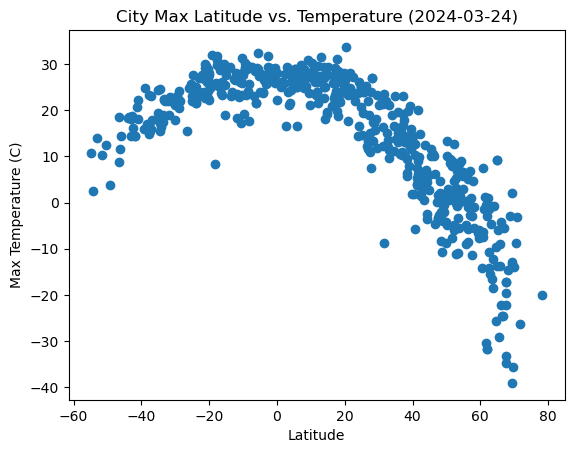

In [11]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(
    x=x,
    y=y
)

# Step 4: add title and labels
plt.title('City Max Latitude vs. Temperature (2024-03-24)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

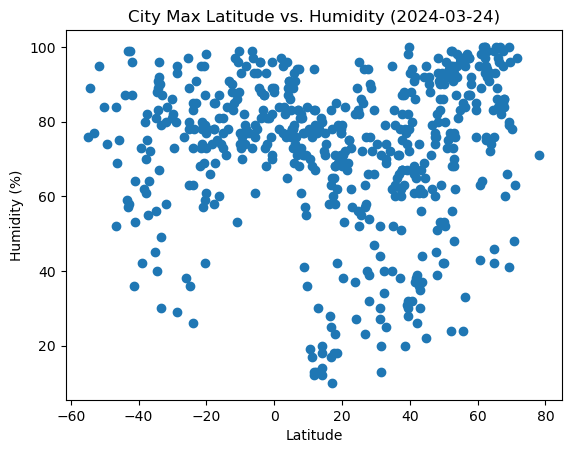

In [12]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(
    x=x,
    y=y
)

plt.title('City Max Latitude vs. Humidity (2024-03-24)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

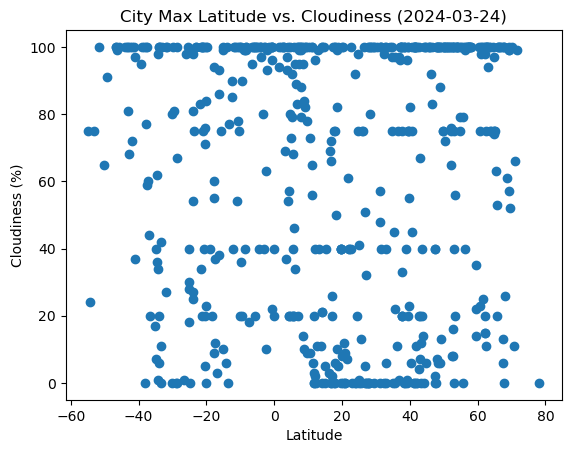

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(
    x=x,
    y=y
)

plt.title('City Max Latitude vs. Cloudiness (2024-03-24)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

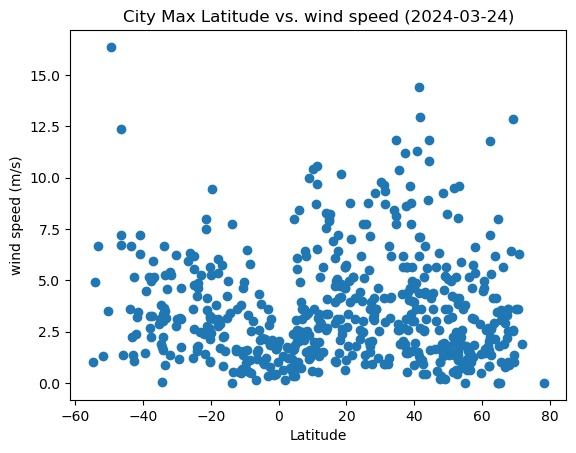

In [14]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']


# Incorporate the other graph properties
plt.scatter(
    x=x,
    y=y
)

plt.title('City Max Latitude vs. wind speed (2024-03-24)')
plt.xlabel('Latitude')
plt.ylabel('wind speed (m/s)')


# Save the figure
plt.savefig("output_data/Fig4.png")


# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # y= mx + c 
    regress_values = x_values * slope + intercept
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}'

    # Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()
    return rvalue**2

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
filt_NH=city_data_df.loc[city_data_df['Lat']>=0]
northern_hemi_df=pd.DataFrame(filt_NH)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,holualoa,19.6228,-155.9522,25.91,71,40,5.66,US,1711414030
4,dudinka,69.4058,86.1778,-39.07,100,57,1.34,RU,1711414033
8,fada,9.5667,8.3000,23.67,36,78,1.33,NG,1711414036
9,newman,37.3138,-121.0208,19.13,62,100,1.79,US,1711414037
11,tiksi,71.6872,128.8694,-26.23,97,99,1.90,RU,1711414038


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
filt_SH=city_data_df.loc[city_data_df['Lat']<0]
southern_hemi_df=pd.DataFrame(filt_SH)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,15.90,64,44,5.93,SH,1711414031
2,ushuaia,-54.8000,-68.3000,10.81,76,75,1.03,AR,1711413950
3,sao felix do xingu,-6.6447,-51.9950,23.06,99,100,0.13,BR,1711413820
5,villa yapacani,-17.4000,-63.8333,25.14,69,37,1.69,BO,1711414034
6,waitangi,-43.9535,-176.5597,18.23,87,100,3.58,NZ,1711414035


###  Temperature vs. Latitude Linear Regression Plot

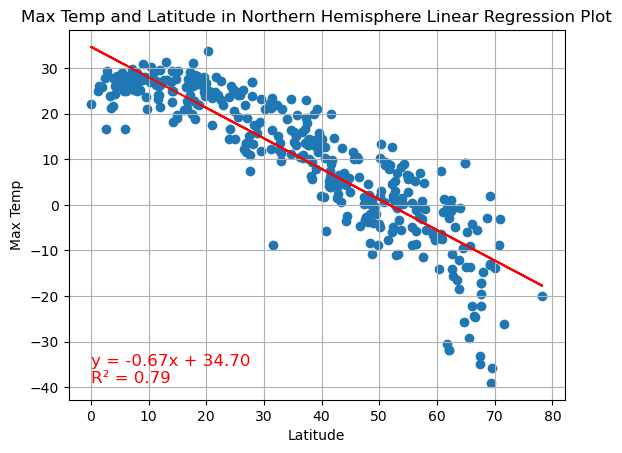

In [18]:
# Linear regression on Northern Hemisphere
rvalue = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Latitude', 'Max Temp','Max Temp and Latitude in Northern Hemisphere Linear Regression Plot')
# print("The r-value is:", rvalue)
plt.show()

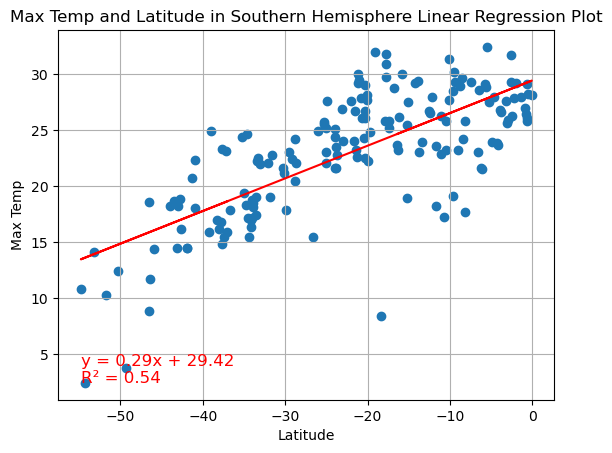

The r-value is: 0.5422271049458206


In [19]:
# Linear regression on Southern Hemisphere
rvalue = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Latitude', 'Max Temp','Max Temp and Latitude in Southern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

# Analysis
##### The analysis reveals a strong positive correlation (R=0.8) between maximum temperature and latitude in the Northern Hemisphere, indicating a clear trend of decreasing temperatures as one moves away from the equator. Conversely, the Southern Hemisphere demonstrates a weaker positive correlation (R=0.45), suggesting a less pronounced relationship between maximum temperature and latitude in that region.

### Humidity vs. Latitude Linear Regression Plot

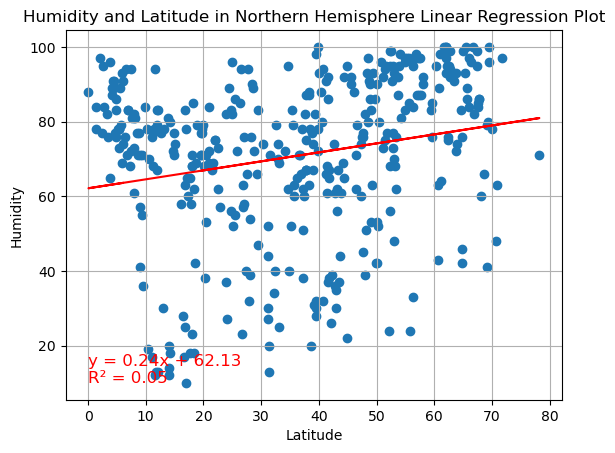

The r-value is: 0.0475901907942923


In [20]:
# Northern Hemisphere
rvalue = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Latitude', 'Humidity','Humidity and Latitude in Northern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()

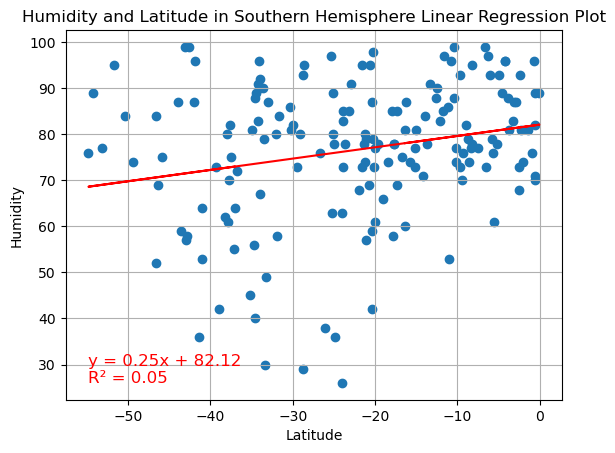

The r-value is: 0.051597420090923156


In [21]:
# Southern Hemisphere
rvalue = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Latitude', 'Humidity','Humidity and Latitude in Southern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

##### The linear regression analysis indicates a very weak positive correlation (R=0.06) between humidity and latitude in the Northern Hemisphere, suggesting minimal association between these variables. Similarly, in the Southern Hemisphere, the correlation between humidity and latitude is also very weak (R=0.05), implying little relationship between humidity levels and latitude in that region.

### Cloudiness vs. Latitude Linear Regression Plot

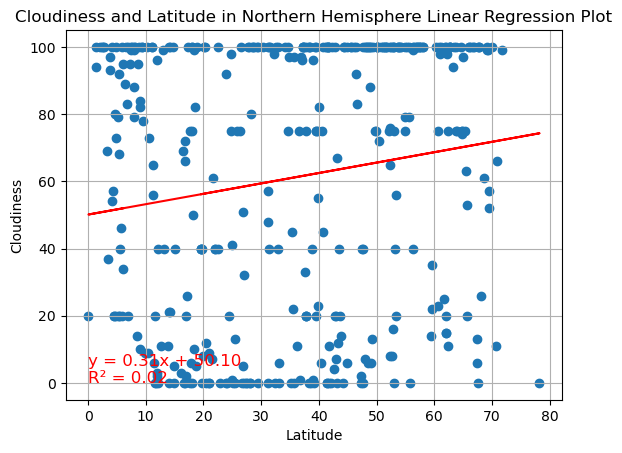

The r-value is: 0.023754213449484814


In [22]:
# Northern Hemisphere
rvalue = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness','Cloudiness and Latitude in Northern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()

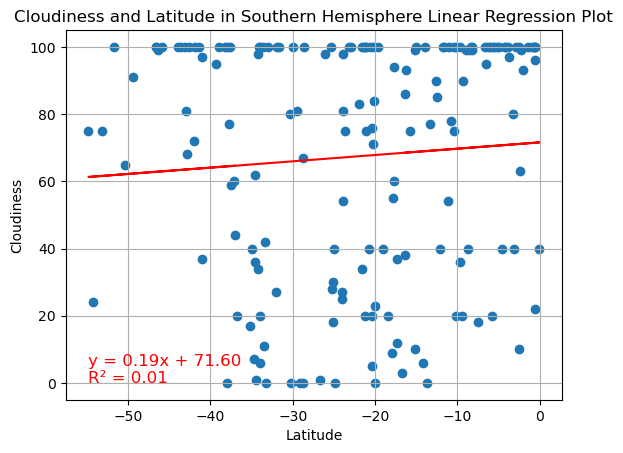

The r-value is: 0.005399048798417864


In [23]:
# Southern Hemisphere
rvalue = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness','Cloudiness and Latitude in Southern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

##### The linear regression analysis demonstrates virtually no correlation (R=0.00) between cloudiness and latitude in the Northern Hemisphere, indicating that latitude has minimal influence on cloud cover in this region. Similarly, in the Southern Hemisphere, the correlation between cloudiness and latitude is extremely weak (R=0.02), suggesting little relationship between these variables in southern latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

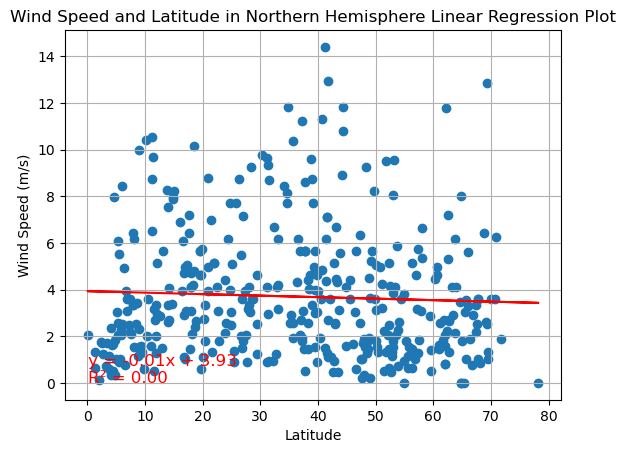

The r-value is: 0.0021807275777408573


In [24]:
# Northern Hemisphere
rvalue = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed (m/s)','Wind Speed and Latitude in Northern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()


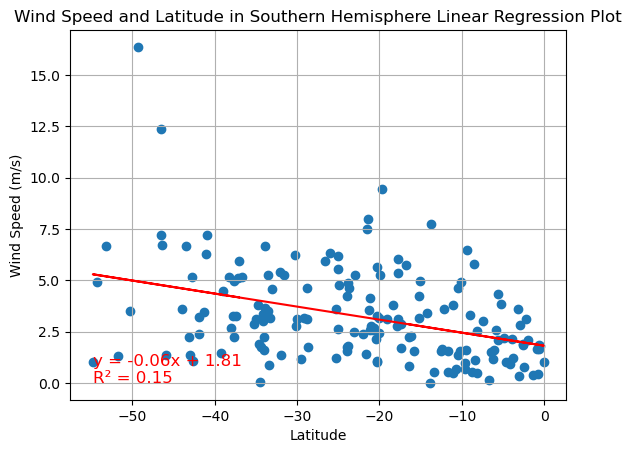

The r-value is: 0.1511869237110844


In [25]:
# Southern Hemisphere
rvalue = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed (m/s)','Wind Speed and Latitude in Southern Hemisphere Linear Regression Plot')
print("The r-value is:", rvalue)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

##### The linear regression analysis reveals no significant correlation (R=0.00) between wind speed and latitude in the Northern Hemisphere, indicating that latitude does not have a discernible influence on wind speed in this region. Conversely, in the Southern Hemisphere, there is a very weak positive correlation (R=0.08) between wind speed and latitude, suggesting a slight tendency for wind speed to increase with increasing distance from the equator in southern latitudes.